In [253]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

import statsmodels.formula.api as smf



In [213]:
# Read the “housing.csv” file
df = pd.read_excel("C:\\Users\HOME\\Desktop\\California Housing Price Prediction Case Study\\1553768847_housing.xlsx")

In [214]:
# Print first few rows of this data.
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [215]:
# Check for columns
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [216]:
#  check the data frame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [217]:
#As per above,ocean_proximity is object and others are numerical  and data is missing in total_bedrooms


In [218]:
#Extract input (X) and output (Y) data from the dataset
X= df.iloc[:,:-1]
Y= df.iloc[:,-1]

In [219]:
# Print extracted values
print(X)
print(Y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
10       -122.26     37.85                  52         2202           434.0   
11       -122.26     37.85                  52      

In [220]:
#Check for missing info
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [221]:
# Fill the missing values with the mean of the respective column.
X['total_bedrooms'] = X['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [222]:
# Check mising data again
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [223]:
# Check na values also in the data
X.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [224]:
# check for unique values in ocean_proximity
X.ocean_proximity.unique().tolist()

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

In [225]:
# check for count in each value
X.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [226]:
# After conerting , check for unique values in ocean_proximity
X.ocean_proximity.unique().tolist()

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

In [227]:
# Label encoding 
labelencoder=LabelEncoder()
X.ocean_proximity = labelencoder.fit_transform(X.ocean_proximity)

X.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


In [228]:
# One hot encode with labled data
ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X.ocean_proximity.values.reshape(-1,1)).toarray()
X_encoded

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [229]:
# Check onehot coded values shape
X_encoded.shape

(20640, 5)

In [230]:
# Add Onehot encoded values to data frame and remove original ocean_proximity
dfOneHot = pd.DataFrame(X_encoded, columns = ["ocean_proximity_"+str(int(i)) for i in range(X_encoded.shape[1])])
X = pd.concat([X, dfOneHot], axis=1)
X.drop(['ocean_proximity'], axis=1,inplace=True)
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_0,ocean_proximity_1,ocean_proximity_2,ocean_proximity_3,ocean_proximity_4
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0.0,0.0,0.0,1.0,0.0


In [231]:
#  Features data shape
X.shape

(20640, 13)

In [232]:
# Lables data shape
Y.shape

(20640,)

In [233]:
# Split the data into 80% training dataset and 20% test dataset
X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [234]:
# Print Data size
print("X_train data  size {} ".format(X_train.shape))
print("X_test data  size {} ".format(X_test.shape))
print("y_train data  size {} ".format(y_train.shape))
print("y_test data  size {} ".format(y_test.shape))


X_train data  size (16512, 13) 
X_test data  size (4128, 13) 
y_train data  size (16512,) 
y_test data  size (4128,) 


In [235]:
# Standardize data  and ping X_train and X_test after standarized 
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print("----Train data----")
print(X_train[0:2,:])
print("----Test data----")
print(X_test[0:2,:])

----Train data----
[[ 1.00389865 -0.8400624  -1.79507596 -0.97773624 -1.09836953 -1.04760128
  -1.1356496   0.19001247 -0.89150581  1.46934754 -0.01348032 -0.35239609
  -0.38649771]
 [-1.43477229  0.98536392  1.85553889 -0.11850059 -0.10859305  0.05210918
  -0.13688171  0.26931072 -0.89150581 -0.68057418 -0.01348032  2.83771591
  -0.38649771]]
----Test data----
[[ 1.2532515  -1.42513494 -0.52529688 -0.24653996 -0.3298652   0.10985054
  -0.33558946  0.14448941 -0.89150581 -0.68057418 -0.01348032 -0.35239609
   2.58733744]
 [ 0.79444225 -0.79793718  0.26831504 -0.00920984 -0.33224447 -0.11324108
  -0.18394407  0.99820424  1.12169768 -0.68057418 -0.01348032 -0.35239609
  -0.38649771]]


In [236]:
#  Perform Linear Regression
lrg = LinearRegression()
#fit the model to the training data (learn the coefficients)
lrg.fit(X_train,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(lrg.intercept_))
print("coefficients  is "+str(lrg.coef_))

Intercept is 207249.8958938948
coefficients  is [-53885.46840492 -54527.98744494  13517.23094821  -9383.62758367
  28402.20799753 -44213.3895578   29852.9318759   73896.66913485
   5977.24593611 -12358.8523152    2341.74204292   2419.20310094
   5916.69631349]


In [238]:
#Predict output for test dataset using the fitted model
pred = lrg.predict(X_test)


In [239]:
# Print root mean squared error (RMSE) and variance from Linear Regression.

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, pred))

# The root mean squared error
print("Root Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, pred)))

# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, pred))

Mean squared error: 4718206968.30
Root Mean squared error: 68689.21
Test Variance score: 0.64


In [240]:
#Perform Decision Tree Regression 
dt =  DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
model_score = dt.score(X_train,y_train)

pred = dt.predict(X_test)

# Print root mean squared error (RMSE) and variance from Linear Regression.

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, pred))

# The root mean squared error
print("Root Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, pred)))

# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, pred))

Mean squared error: 4619515331.82
Root Mean squared error: 67967.02
Test Variance score: 0.65


In [241]:
# Perform Random Forest Regression 
rf = RandomForestRegressor(n_estimators= 20, random_state=42)
rf.fit(X_train, y_train)
model_score = rf.score(X_train,y_train)

pred = rf.predict(X_test)

# Print root mean squared error (RMSE) and variance from Linear Regression.

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, pred))

# The root mean squared error
print("Root Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, pred)))

# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, pred))


Mean squared error: 2375765148.47
Root Mean squared error: 48741.82
Test Variance score: 0.82


In [242]:
#print accuracy
errors = abs(pred - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 81.79 %.


In [243]:
# Bonus exercise: Perform Linear Regression with one independent variable 
feature_col = ['median_income']
X= df[feature_col]
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)


In [244]:
# default split is 80% for training and 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 1)
(16512,)
(4128, 1)
(4128,)


In [245]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [246]:
# Print root mean squared error (RMSE) and variance from Linear Regression.

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, pred))

# The root mean squared error
print("Root Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, pred)))

# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, pred))

Mean squared error: 6926929696.09
Root Mean squared error: 83228.18
Test Variance score: 0.47


In [247]:
#Predict output for test dataset using the fitted model.
sm_model = smf.ols(formula='median_house_value ~  median_income', data=df).fit()

In [248]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:00:23   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.509e+04   1322.872     34.082      0.000    4.25e+04    4.77e+04
median_income  4.179e+04    306.806    136.223      0.000    4.12e+04    4.24e+04
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
sm_model.rsquared

0.47344749180719914

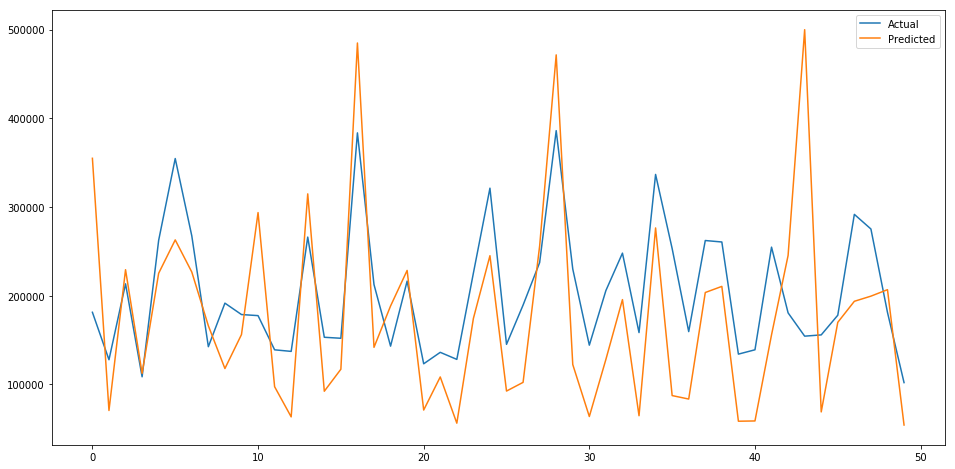

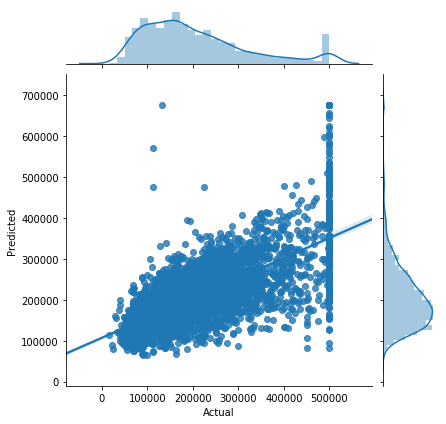

In [250]:
#Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data
test = pd.DataFrame({'Predicted':pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")


Text(0, 0.5, ' Predicted median_house_value')

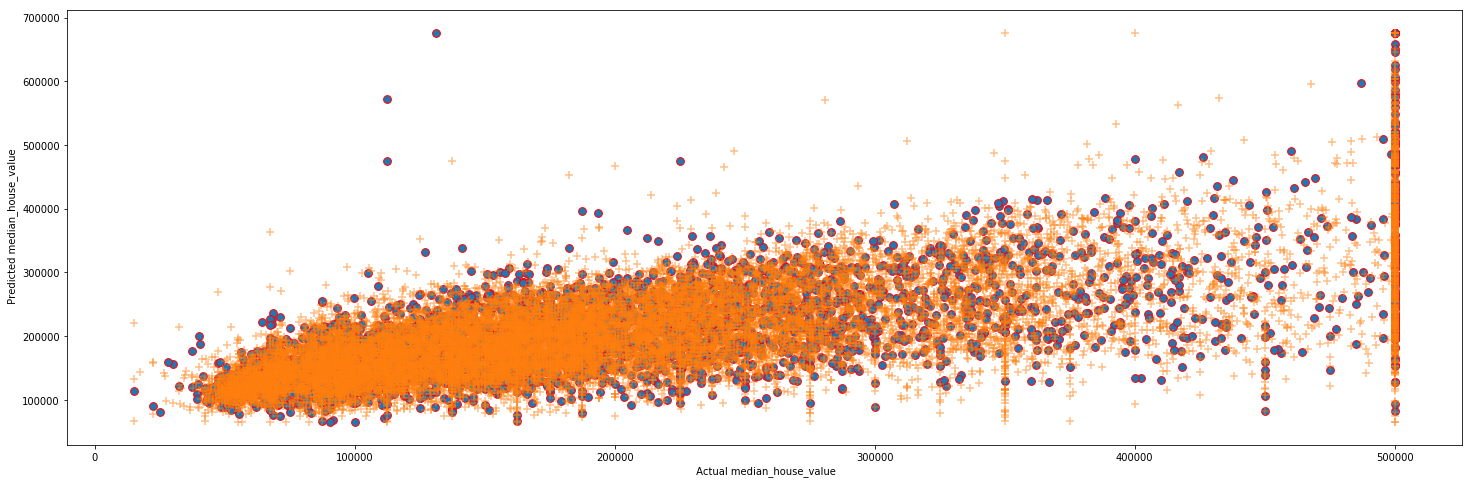

In [251]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test,pred,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train,linreg.predict(X_train),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")